# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
import time
import os
import datetime

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [73]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
# function to call API
def requestWeatherAPI():
    counter = 1
    sets = 1
    max_counter = 51
    first_iter = True
    start_index = 0
        
    len_cities = len(cities)
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    query_url = f"{url}appid={api_key}&units={units}&q="
    
    while start_index < len_cities:
        try:
            response = requests.get(query_url+cities[start_index]).json()
            #print(response)
            if int(response['cod']) == 200:
                print(f'Processing Record {counter} of Set {sets} | {cities[start_index]}')
                city.append(response['name'])
                cloudiness.append(response['clouds']['all'])
                country.append(response['sys']['country'])
                date.append(response['dt'])
                humidity.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                maxtemp.append(response['main']['temp_max'])
                windsped.append(response['wind']['speed'])
                counter += 1
            elif int(response['cod']) == 404:
                print('City not found. Skipping...')
            # following if condition is added to print same kind of output given in notebook
            if first_iter == True:
                if counter == max_counter:
                    counter = 0
                    sets += 1
                    # adding sleep to comply with OWM policy
                    time.sleep(60)
                    first_iter = False
            else:
                if counter == max_counter - 1:
                    counter = 0
                    sets += 1
                    time.sleep(20)
                    first_iter = False        
        except KeyError: 
            print("Key not found...")
        # Call any unmwanted exception
        except Exception as e: 
            print("Catching generic exception..." + str(e))
        finally:
            start_index += 1

In [78]:
# Calling function
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windsped = []
requestWeatherAPI()

City not found. Skipping...
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | coracora
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sault sainte marie
Processing Record 19 of Set 1 | kahului
City not found. Skipping...
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | omsukchan
Processing Record 22 of Set 1 | saint george
Processing Reco

Processing Record 35 of Set 4 | srivardhan
Processing Record 36 of Set 4 | latung
Processing Record 37 of Set 4 | haines junction
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | russell
Processing Record 40 of Set 4 | ahuimanu
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | ulety
City not found. Skipping...
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | pittsfield
Processing Record 45 of Set 4 | toro
Processing Record 46 of Set 4 | shiyan
Processing Record 47 of Set 4 | bjornevatn
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | puerto escondido
Processing Record 0 of Set 5 | ponta do sol
Processing Record 1 of Set 5 | zhicheng
Processing Record 2 of Set 5 | baykit
Processing Record 3 of Set 5 | loksa
City not found. Skipping...
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | gizo
City not found. Skipping...
City no

Processing Record 21 of Set 8 | udgir
Processing Record 22 of Set 8 | porto novo
Processing Record 23 of Set 8 | enshi
Processing Record 24 of Set 8 | summerville
Processing Record 25 of Set 8 | margate
Processing Record 26 of Set 8 | bonfim
Processing Record 27 of Set 8 | sarrebourg
Processing Record 28 of Set 8 | sinnamary
Processing Record 29 of Set 8 | jasper
Processing Record 30 of Set 8 | ouallam
Processing Record 31 of Set 8 | tabuk
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | belturbet
Processing Record 34 of Set 8 | victor harbor
Processing Record 35 of Set 8 | keetmanshoop
Processing Record 36 of Set 8 | matay
Processing Record 37 of Set 8 | mango
Processing Record 38 of Set 8 | port-gentil
Processing Record 39 of Set 8 | naze
City not found. Skipping...
Processing Record 40 of Set 8 | santa barbara
Processing Record 41 of Set 8 | labuhan
City not found. Skipping...
Processing Record 42 of Set 8 | sharjah
Processing Record 43 of Set 8 | podyuga
Proce

Processing Record 4 of Set 12 | iwanai
Processing Record 5 of Set 12 | waddan
Processing Record 6 of Set 12 | pundaguitan
Processing Record 7 of Set 12 | erzin
Processing Record 8 of Set 12 | bastrop
Processing Record 9 of Set 12 | lodja
Processing Record 10 of Set 12 | jinchang
Processing Record 11 of Set 12 | itatskiy
City not found. Skipping...
Processing Record 12 of Set 12 | lincoln
Processing Record 13 of Set 12 | aswan
Processing Record 14 of Set 12 | solnechnyy
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 12 | chongqing
Processing Record 16 of Set 12 | kalabo
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | ypsonas
Processing Record 19 of Set 12 | athabasca
Processing Record 20 of Set 12 | constitucion
Processing Record 21 of Set 12 | richards bay
Processing Record 22 of Set 12 | manado


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
# create a data frame from cities, lat, and temp etc.
weather_dict = {
    "City": city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng" : lng,
    "Max Temp" : maxtemp,
    "Wind Speed" : windsped
}
weather_data = pd.DataFrame(weather_dict)

# create directory to save file
if not os.path.exists('output_data'):
    os.mkdir('output_data')
    
weather_data.to_csv(output_data_file)
weather_data.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [80]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavieng,20,PG,1538197531,100,-2.57,150.80,30.25,2.47
1,Padang,48,ID,1538197554,100,-0.92,100.36,26.61,2.57
2,Butaritari,24,KI,1538197530,100,3.07,172.79,30.00,2.07
3,Carnarvon,0,ZA,1538197554,38,-30.97,22.13,6.91,5.62
4,Coracora,8,PE,1538197346,74,-15.02,-73.78,-1.95,1.67


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

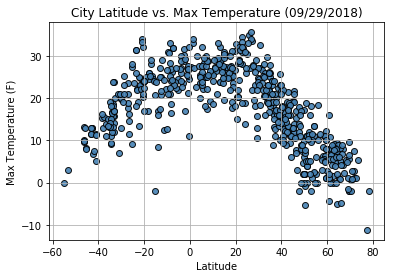

In [88]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save Figure
plt.savefig('output_data/LatvsTemp.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

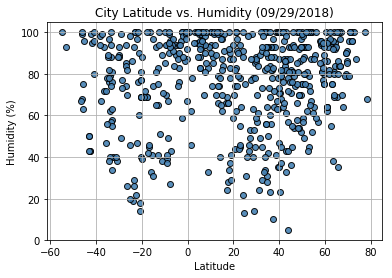

In [89]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save Figure
plt.savefig('output_data/LatvsHumidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

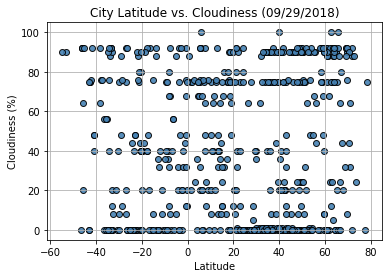

In [90]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save Figure
plt.savefig('output_data/LatvsCloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

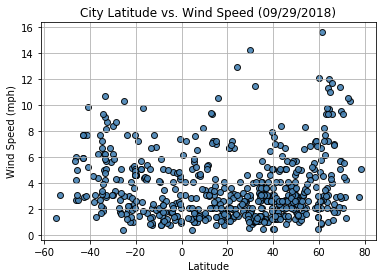

In [91]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
# Save Figure
plt.savefig('output_data/LatvsWind.png')

# Show plot
plt.show()